# CS 373 Project
By Tianyu Chen(chen2216@purdue.edu), Hei Jing Tsang(tsangh@purdue.edu), Shikang Fan(fan165@purdue.edu), Ruoyu Song( song464@purdue.edu)

## 1 Load data

In [2]:
import pandas as pd
import datetime

def gen_clean_data():
    df = pd.read_csv("Melbourne_housing_FULL.csv")
    df = df[['Price', 'Distance', 'Car', 'BuildingArea', 'YearBuilt']]
    clean_df = df.dropna(how='any', axis=0)
    clean_df.to_csv("clean_data.csv", sep='\t')
    return clean_df

gen_clean_data().head(10)


,Price,Distance,Car,BuildingArea,YearBuilt
2,1035000.0,2.5,0.0,79.0,1900.0
4,1465000.0,2.5,0.0,150.0,1900.0
6,1600000.0,2.5,2.0,142.0,2014.0
11,1876000.0,2.5,0.0,210.0,1910.0
14,1636000.0,2.5,2.0,107.0,1890.0
18,1097000.0,2.5,2.0,75.0,1900.0
24,1350000.0,2.5,2.0,190.0,2005.0
25,750000.0,2.5,1.0,94.0,2009.0
30,1310000.0,2.5,2.0,97.0,1890.0
32,1200000.0,2.5,1.0,110.0,1880.0


## 2 Data interpretation
### For this project, we have the real estate trading history over the past few years from Melbourne, Australia, and our goal is to predict the house price(total) by learning from the dataset.
To predict the house price for the city of Melbourne, Australia, we have selected 4 features out of the original 13 features. In Part 1.1, we have also filtered out the data entries where there are missing values. In the process of filtering, we dropped some features that has clearly no influence over the market price, such as the seller's name, and those that we consider to have very minimal impact like the floor plan, number of bedrooms and bathrooms.

Eventually, we have selected 4 features that we believe could be used to predict the price relatively accurately. These features are, 
    1. Distance to downtown CBD (Distance);
    2. Number of parking lots (Car);
    3. Building area (BuildingArea);
    4. The year that the house was built (YearBuilt).

## 3. Analyze the data

We are planning to perform linear regression to predict the price, therefore we would like to plot each feature versus the actual price to show why linear regression is useful in this case

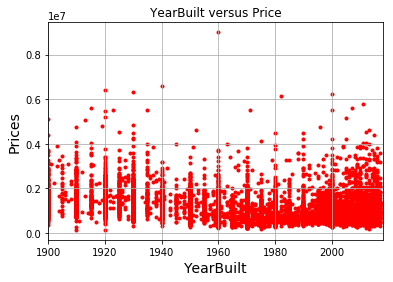

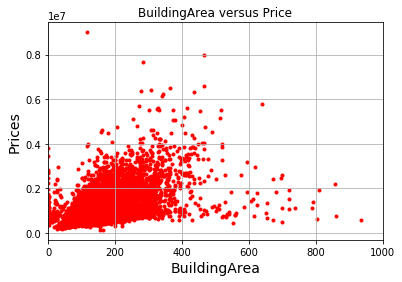

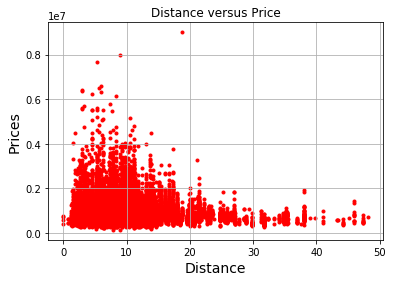

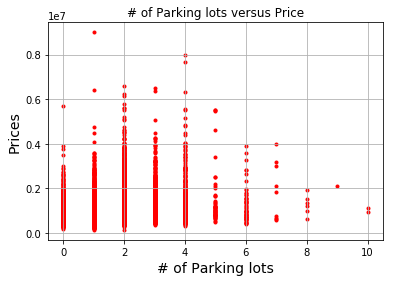

In [3]:
import matplotlib.pyplot as plt
import matplotlib.markers as mk
import pandas as pd
import numpy as np
# Read data
df = pd.read_csv("clean_data.csv", sep='\t')

# Plot yearbuilt versus price
plt.scatter(df['YearBuilt'], df['Price'], color='red', marker='.')
plt.title('YearBuilt versus Price')
# Don't show the outliers
plt.xlim((1900, 2018))
plt.xlabel('YearBuilt', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot buildingarea versus price
plt.scatter(df['BuildingArea'], df['Price'], color='red', marker='.')
plt.title('BuildingArea versus Price')
# Zoom in
plt.xlim((0, 1000))
plt.xlabel('BuildingArea', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot distance versus price
plt.scatter(df['Distance'], df['Price'], color='red', marker='.')
plt.title('Distance versus Price')
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot Car(Parking lots) versus price
plt.scatter(df['Car'], df['Price'], color='red', marker='.')
plt.title('# of Parking lots versus Price')
plt.xlabel('# of Parking lots', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()


Graph 1: As we can see for the YearBuild graph, there seems to be a ascending trend of price from 1960 to 2018. This could be that houses before 1960 have probably undergone some forms of renovation, so even though the house is built relatively long ago, the price could still be high due to the cost of renovation. There are also lots of outliers because of the fact that the price does not solely depend on the year built but other factors.

Graph 2: In the graph, we can clearly denote the linear relationship between price and building area.

Graph 3: Like area versus building graph, we can see negative linear relationship between the price and distance to the CBD. This is expected, because of the common knowledge that the farther away the house is from the CBD the lower the price is.

Graph 4: We have considered the number of parking lots can add some values to the property, as you can see on the x = 0 to x = 4. The prices of the properties increase as the number of parking lots goes up. But it seems that when the number of parking lots exceeds 5, the price becomes lower. A possible explanation would be houses that have more than 5 parking lots are usually located in the suburban which is why there are ample spaces for parking. And houses in suburban areas are usually cheaper. Nonetheless, we still believe that the number of parking lot would add marginal value to the value of the property.

## 4.1 Training on the whole dataset

In [4]:
from sklearn.utils import shuffle

def get_data_points():
    df = pd.read_csv("clean_data.csv", sep='\t')
    df = df.dropna(how='any', axis=0)
    df = shuffle(df)
    x_points = df[['Distance', 'Car','BuildingArea', 'YearBuilt']]
    y_points = df[['Price']]
    
    # We shuffle the data points here
    
    return np.array(x_points), np.array(y_points)

get_data_points()

(array([[  1.31000000e+01,   1.00000000e+00,   1.23000000e+02,
           2.00800000e+03],
        [  4.50000000e+00,   1.00000000e+00,   1.09000000e+02,
           1.91000000e+03],
        [  1.24000000e+01,   2.00000000e+00,   3.10000000e+02,
           1.96300000e+03],
        ..., 
        [  1.96000000e+01,   2.00000000e+00,   1.27000000e+02,
           2.01200000e+03],
        [  6.30000000e+00,   2.00000000e+00,   1.28000000e+02,
           1.91000000e+03],
        [  2.18000000e+01,   3.00000000e+00,   1.35000000e+02,
           1.98000000e+03]]), array([[  542000.],
        [ 1283000.],
        [ 1400000.],
        ..., 
        [  630000.],
        [ 1726000.],
        [  870000.]]))

## 4.2 Training with ridge linear regression

In this section we will perform ridge linear regression and lasso linear regression without cross validation, just to see the best scenario that is, the maximum accuracy we can possibly achieve. We will perform cross validation in the next section.

In [33]:
from sklearn.linear_model import Ridge

# Obtain training data
x, y = get_data_points()
x_train = x
y_train = y

ridge = Ridge(alpha=1)
ridge_mod = ridge.fit(x_train, y_train) 
ridge_pred = ridge_mod.predict(x)

y_flat = y.flatten()
sq_err = [ (y_flat[i] - ridge_pred[i]) ** 2 for i in range(len(y_flat))]

print("MSE: %f" % np.mean(sq_err))
print("Standard MSE: %f" % np.sqrt(np.mean(sq_err)))

MSE: 255465091826.558990
Standard MSE: 505435.546659


## 4.3 Training with lasso regression

In [36]:
from sklearn.linear_model import Lasso

x, y = get_data_points()
x_train = x
y_train = y

lasso = Lasso(alpha=1)
lasso_mod = lasso.fit(x_train, y_train) 
lasso_pred = lasso_mod.predict(x)

y_flat = y.flatten()
sq_err = [ (y_flat[i] - lasso_pred[i]) ** 2 for i in range(len(y_flat))]

print("MSE: %f" % np.mean(sq_err))
print("Standard MSE: %f" % np.sqrt(np.mean(sq_err)))

MSE: 255465091694.998657
Standard MSE: 505435.546529


## 4.4 Conclusion

Here we can denote that, for ridge regression, when alpha is 1, the best percision we can possibly achieve is standard mean square error = 505435.546659, MSE = 255465091826.558929, and for lasso regression when the alpha is 1, the best percision we can achieve is standard mean square error = 505435.546529, MSE = 255465091694.998657. And in the following sections, we will try to figure the best value of alpha for each regression method along with cross-validation to minimize the error. 

## 5.1 Ten-fold cross validation ridge regression

Here we are still using alpha = 1 just to validate our training method, we will be using hyperparameter tuning with nested cross validation in the next section.

In [38]:
from sklearn.linear_model import Ridge

def ridge_regression(x_train, y_train, x, y):
    # Training
    ridge = Ridge(alpha=1)
    ridge_mod = ridge.fit(x_train, y_train) 
    # Predicting
    ridge_pred = ridge_mod.predict(x)
    # Calculate standard MSE
    y_flat = y.flatten()
    sq_err = [ (y_flat[i] - ridge_pred[i]) ** 2 for i in range(len(y_flat))]
    return np.sqrt(np.mean(sq_err))
    
# Function for performing K-fold cross validation
def k_fold(k,X,y):
    (n, d) = np.shape(X)
    z = np.zeros((k, 1))
    for i in range(0,k):
        T = set(range(int(np.floor((n*i)/k)), int(np.floor(((n*(i+1))/k)-1))+1))
        S = set(range(0, n)) - T

        z[i] = ridge_regression(X[list(S)], y[list(S)], X[list(T)], y[list(T)])
    return z

x, y = get_data_points()
k_fold(10, x, y)

array([[ 482874.22721615],
       [ 496347.0869139 ],
       [ 453516.27040967],
       [ 472099.73437754],
       [ 461123.40551045],
       [ 663985.58852526],
       [ 562733.96520826],
       [ 482533.37735551],
       [ 543948.04901774],
       [ 443128.14059662]])

As you can see, the standard MSE are actually quite close to our result in the previous section, which is a good sign.

## 5.2 Ten-fold cross validation lasso regression

In [39]:
from sklearn.linear_model import Lasso

def lasso_regression(x_train, y_train, x, y):
    # Training
    lasso = Lasso(alpha=1)
    lasso_mod = lasso.fit(x_train, y_train) 
    # Predicting
    lasso_pred = lasso_mod.predict(x)
    y_flat = y.flatten()
    sq_err = [ (y_flat[i] - lasso_pred[i]) ** 2 for i in range(len(y_flat))]
    return np.sqrt(np.mean(sq_err))
    
# Function for performing K-fold cross validation
def k_fold(k,X,y):
    (n, d) = np.shape(X)
    z = np.zeros((k, 1))
    for i in range(0,k):
        T = set(range(int(np.floor((n*i)/k)), int(np.floor(((n*(i+1))/k)-1))+1))
        S = set(range(0, n)) - T
        
        z[i] = lasso_regression(X[list(S)], y[list(S)], X[list(T)], y[list(T)])
    return z

x, y = get_data_points()
k_fold(10, x, y)

array([[ 501292.66582142],
       [ 576860.3918803 ],
       [ 505380.94606706],
       [ 436512.62423146],
       [ 470500.90867136],
       [ 506558.29593856],
       [ 662211.35985902],
       [ 482408.90066926],
       [ 488983.34390354],
       [ 446613.67685203]])

As you can see, the standard MSE are actually quite close to our result in the previous section which is a good sign.

## 6.1 Hyperparameter tuning with nested cross validation


In this section, we will see how to properly tune hyperparameters by using nested cross validation. We will be using bootstrapping inside ten-fold cross validation. We call it nested cross validation because we use one cross validation method inside another one. For bootstraping inside k-fold validation, we use B = 10(otherwise the process could be too slow).

## 6.2 Ridge regression

In [74]:
from scipy.stats import mode

def bootstrapping_ridge(B, X_subset, y_subset, alpha):
    # Get the size of the data
    n = len(X_subset)
    # Have an array to record errors
    bs_err = np.zeros(B)
    # Repeat B times
    for b in range(B):
        # Randomly select n samples
        train_samples = list(np.random.randint(0,n,n))
        # Construct test samples
        test_samples = list(set(range(n)) - set(train_samples))
        # Construct learning model
        ridge = Ridge(alpha=alpha)
        # Start learning
        ridge.fit(X_subset[train_samples], y_subset[train_samples])
        # Export result of test data
        ridge_pred = ridge.predict(X_subset[test_samples])
        # Store error in best error array 
        y_flat = y_subset[test_samples].flatten()
        sq_err = [ (y_flat[i] - ridge_pred[i]) ** 2 for i in range(len(y_flat))]
        bs_err[b] = np.sqrt(np.mean(sq_err))
    
    err = np.mean(bs_err)
    return err

# Get data points
x, y = get_data_points()
# Get data shape
(n, d) = np.shape(x)
# Set k = 10 because we are still doing 10-fold
k = 10
# Best alpha_list 
best_alphas = []

# Do k-folds
for i in range(k):
    # Alpha candidates
    alpha_arr = [1e-2, 1e-1, 0, 1e1, 1e2, 1e3, 1e4, 1e5]
    # Store best alpha
    best_a = None
    # Store best err
    best_err = None

    T = set(range(int(np.floor((n*i)/k)), int(np.floor(((n*(i+1))/k)-1))+1))
    S = set(range(0, n)) - T
    
    for a in alpha_arr:
    
        e = bootstrapping_ridge(30, x[list(S)], y[list(S)], a)
        
        if best_err is None or e < best_err:
            best_err = e
            best_a = a
            
    print("Fold #%d: Best error is %f" % (i, best_err))
    best_alphas.append(best_a)
    
print(best_alphas)
print(mode(best_alphas))

Fold #0: Best error is 508526.723718
Fold #1: Best error is 502742.119393
Fold #2: Best error is 505394.709562
Fold #3: Best error is 502721.242911
Fold #4: Best error is 499539.515885
Fold #5: Best error is 501757.168018
Fold #6: Best error is 506532.205451
Fold #7: Best error is 489093.110946
Fold #8: Best error is 510649.783028
Fold #9: Best error is 509523.176233
[0, 100.0, 10.0, 0, 0.1, 0.01, 0.1, 0.01, 0, 10.0]
ModeResult(mode=array([ 0.]), count=array([3]))


## 6.3 Lasso regression

Note: Here we cannot use alpha = 0 because the data won't converge well when alpha is 0, hence, we use 1 instead.

In [81]:
from scipy.stats import mode

def bootstrapping_lasso(B, X_subset, y_subset, alpha):
    # Get the size of the data
    n = len(X_subset)
    # Have an array to record errors
    bs_err = np.zeros(B)
    # Repeat B times
    for b in range(B):
        # Randomly select n samples
        train_samples = list(np.random.randint(0,n,n))
        # Construct test samples
        test_samples = list(set(range(n)) - set(train_samples))
        # Construct learning model
        lasso = Lasso(alpha=alpha)
        # Start learning
        lasso.fit(X_subset[train_samples], y_subset[train_samples])
        # Export result of test data
        lasso_pred = lasso.predict(X_subset[test_samples])
        # Store Standard MSE
        y_flat = y_subset[test_samples].flatten()
        sq_err = [ (y_flat[i] - lasso_pred[i]) ** 2 for i in range(len(y_flat))]
        bs_err[b] = np.sqrt(np.mean(sq_err))
    
    err = np.mean(bs_err)
    return err

# Get data points
x, y = get_data_points()
# Get data shape
(n, d) = np.shape(x)
# Set k = 10 because we are still doing 10-fold
k = 10
# Best alpha_list 
best_alphas = []

# Do k-folds
for i in range(k):
    # Alpha candidates
    alpha_arr = [-1e2, -1e1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]
    # Store best alpha
    best_a = None
    # Store best err
    best_err = None

    T = set(range(int(np.floor((n*i)/k)), int(np.floor(((n*(i+1))/k)-1))+1))
    S = set(range(0, n)) - T
    
    for a in alpha_arr:
        # Doing bootstraping inside the k-fold sample data
        e = bootstrapping_lasso(30, x[list(S)], y[list(S)], a)
        
        if best_err is None or e < best_err:
            best_err = e
            best_a = a
            
    print("Fold #%d: Best error is %f" % (i, best_err))
    best_alphas.append(best_a)
    
print(best_alphas)
print(mode(best_alphas))

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold #0: Best error is 511796.560742
Fold #1: Best error is 503521.284261
Fold #2: Best error is 512366.010354
Fold #3: Best error is 501250.517919
Fold #4: Best error is 492917.809549
Fold #5: Best error is 509199.033800
Fold #6: Best error is 501666.991677
Fold #7: Best error is 497308.991026
Fold #8: Best error is 509523.851530
Fold #9: Best error is 508728.364332
[10000.0, -10.0, -10.0, 10.0, 10.0, 10000.0, -100.0, 1000.0, 1000.0, 1000.0]
ModeResult(mode=array([ 1000.]), count=array([3]))


The best alphas for both regression are hard to find because the bootstraping could cause very large variance thus changing our best alpha value. My method of finding the best alpha is by using the vote system, that is we take the alpha value that has the most occurence in the best_alpha array.

For ridge regression we found that the best alpha value for our problem is 0. We have actually repeated the proccedure multiple times, and in most cases, the alpha value would be somewhat close to 0 (-10, or 10). 

And for Lasso regression, in most cases, I get alpha equal to $10^3$(1e3). Therefore, for the best hyperparameters of those 2 regressions, I would use ${\alpha} = 0$ for ridge regression and ${\alpha} = -10^2$ for lasso regression.

## 7. Discussion

In this section, since we have finished analyzing the problem, training, cross validation and hyperparameters tuning, we are going to access and discuss our result. 

First and foremost, we would like to know how good the linear regression is, that is how accurate is the our prediction versus the reality. To answer this question, we would use MSE and coefficient of determination as a reference. Here's how we figure out the coefficient of determination, 

In [79]:
from statistics import mean
def coef_determin(y_real, y_pred):
    y_bar = sum(y_real) / len(y_real)
    SE_y = sum([(y - y_bar) ** 2 for y in y_real])
    SE_line = sum([(y_real[i] - y_pred[i]) ** 2 for i in range(len(y_real))])
    return 1. - (SE_line / SE_y)[0]

x, y = get_data_points()
ridge = Ridge(alpha=0)
ridge_mod = ridge.fit(x, y) 

ridge_pred = ridge_mod.predict(x)
y_flat = y.flatten()
sq_err = [ (y_flat[i] - ridge_pred[i]) ** 2 for i in range(len(y_flat))]

print("Ridge regression")
print("R^2: %f" % coef_determin(y, ridge_pred))
print("Standard MSE: %f" % np.sqrt(np.mean(sq_err)))

lasso = Lasso(alpha=1e3)
lasso_mod = lasso.fit(x, y) 

lasso_pred = lasso_mod.predict(x)
y_flat = y.flatten()
sq_err = [ (y_flat[i] - lasso_pred[i]) ** 2 for i in range(len(y_flat))]

print("Lasso regression")
print("R^2: %f" % coef_determin(y, lasso_pred))
print("Standard MSE: %f" % np.sqrt(np.mean(sq_err)))

Ridge regression
R^2: 0.446790
Standard MSE: 505435.546528
Lasso regression
R^2: 0.446787
Standard MSE: 505436.872038


Our coefficient of determination is 0.446790 (best case scenario), given the fact the maximum value of R^2 is 1, the our result is acceptable even though not perfect. More intuitively speaking, our prediction of price is averagely off by 505435 $(Austrailian Dollar since the data are from Melbounrn), which is not quite useful in terms of practical usage. Furthermore, those errors are our best case scenarios, therefore we should expect the error to be much larger (above MSE = 500000) like we did in the cross validation.  

Furthermore, we would like to know, what causes this inaccruacy. In fact, there are several reasons that our predict is so inaccurate,
* First, the number of car lots does not really have linear relationship with the price of the house, as we plotted on part 2. If when the number of parking lots goes above 6, the price seems to go down. 
* Like the previous one, the year built seems to have a linear relationship with price, but there are lots of outlier, the relationship is really weak.
* Besides, the house price is really capricious without knowing the actually location, block, peripherals. And the market is also fluctuating all the time, so the data itself could vary alot. 

Besides, we are also interested, that if linear regression is a good way to predict the house price, in other words, is there better ways to predict the price like non-linear regression etc. To verify this, we could use residual testing from statistics to see if linear regression is a good model to use. 